In [1]:
import pickle
import numpy as np
import networkx as nx
import pandas as pd
import brainmaptools as brainmap
import matplotlib.pyplot as plt
import community
import brainx.modularity as mod
import operator
%matplotlib inline
import csv
import scipy as scipy
import scipy.io as io
import math as math
import My_functions as myfunctions

/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/__init__.py:30: UserWarning: Monkeypatching NetworkX's Watts-Strogatz routine
  warnings.warn("Monkeypatching NetworkX's Watts-Strogatz routine")


In [228]:
domains= ['Memory', 'Working Memory', 'Emotion', 'Attention', 'Language', 'Vision', 'Audition']
domainsfile="/Users/owner/Functional_Connectivity/Results/studies_filtered_by_domain.pck"
domaindata=pickle.load(open(domainsfile, "rb" ))

In [3]:
datadir="/Users/owner/Functional_Connectivity/Data/Workspaces/PFC_Xcel/"

In [4]:
left_workspaces=['C633.csv\n','C634.csv\n','C635.csv\n','C636.csv\n','C637.csv\n','C638.csv\n','C38.csv\n','C39.csv\n','C40.csv\n','C41.csv\n','C48.csv\n','C50.csv\n','C51.csv\n','C52.csv\n','C53.csv\n','C54.csv\n','C63.csv\n','C72.csv\n','C64.csv\n','C65.csv\n','C66.csv\n','C67.csv\n','C68.csv\n','C69.csv\n','C70.csv\n','C71.csv\n','C82.csv\n','C83.csv\n','C84.csv\n','C88.csv\n','C97.csv\n','C98.csv\n','C99.csv\n','C100.csv\n','C101.csv\n','C102.csv\n','C103.csv\n','C104.csv\n','C105.csv\n','C106.csv\n','C89.csv\n','C90.csv\n','C91.csv\n','C92.csv\n','C93.csv\n','C94.csv\n','C95.csv\n','C96.csv\n','C107.csv\n','C108.csv\n','C109.csv\n','C110.csv\n','C135.csv\n','C144.csv\n','C145.csv\n','C146.csv\n','C147.csv\n','C148.csv\n','C136.csv\n','C137.csv\n','C138.csv\n','C139.csv\n','C140.csv\n','C141.csv\n','C142.csv\n','C143.csv\n','C150.csv\n','C159.csv\n','C160.csv\n','C161.csv\n','C151.csv\n','C152.csv\n','C153.csv\n','C154.csv\n','C155.csv\n','C156.csv\n','C157.csv\n','C158.csv\n','C171.csv\n','C172.csv\n','C173.csv\n','C174.csv\n','C398.csv\n','C407.csv\n','C408.csv\n','C409.csv\n','C410.csv\n','C411.csv\n','C399.csv\n','C400.csv\n','C401.csv\n','C402.csv\n','C403.csv\n','C404.csv\n','C405.csv\n','C406.csv\n','C467.csv\n','C468.csv\n','C469.csv\n','C475.csv\n','C476.csv\n','C482.csv\n','C483.csv\n','C485.csv\n','C486.csv\n','C487.csv\n','C488.csv\n','C489.csv\n','C490.csv\n']

In [5]:
right_workspaces=['C1.csv\n','C2.csv\n','C3.csv\n','C4.csv\n','C5.csv\n','C42.csv\n','C43.csv\n','C44.csv\n','C45.csv\n','C46.csv\n','C47.csv\n','C56.csv\n','C57.csv\n','C58.csv\n','C59.csv\n','C60.csv\n','C61.csv\n','C62.csv\n','C73.csv\n','C74.csv\n','C75.csv\n','C76.csv\n','C77.csv\n','C78.csv\n','C79.csv\n','C80.csv\n','C81.csv\n','C85.csv\n','C86.csv\n','C87.csv\n','C111.csv\n','C112.csv\n','C113.csv\n','C114.csv\n','C115.csv\n','C124.csv\n','C125.csv\n','C126.csv\n','C127.csv\n','C128.csv\n','C129.csv\n','C130.csv\n','C131.csv\n','C132.csv\n','C133.csv\n','C116.csv\n','C134.csv\n','C117.csv\n','C118.csv\n','C119.csv\n','C120.csv\n','C121.csv\n','C122.csv\n','C123.csv\n','C162.csv\n','C163.csv\n','C164.csv\n','C165.csv\n','C166.csv\n','C167.csv\n','C168.csv\n','C169.csv\n','C170.csv\n','C175.csv\n','C176.csv\n','C177.csv\n','C178.csv\n','C179.csv\n','C188.csv\n','C189.csv\n','C190.csv\n','C191.csv\n','C192.csv\n','C193.csv\n','C194.csv\n','C180.csv\n','C181.csv\n','C182.csv\n','C183.csv\n','C184.csv\n','C185.csv\n','C186.csv\n','C187.csv\n','C412.csv\n','C421.csv\n','C422.csv\n','C423.csv\n','C424.csv\n','C425.csv\n','C413.csv\n','C414.csv\n','C415.csv\n','C416.csv\n','C417.csv\n','C418.csv\n','C419.csv\n','C420.csv\n','C470.csv\n','C471.csv\n','C472.csv\n','C477.csv\n','C480.csv\n','C481.csv\n','C491.csv\n','C492.csv\n','C493.csv\n','C494.csv\n','C495.csv\n','C496.csv\n','C497.csv\n','C498.csv\n','C499.csv\n']

In [6]:
left_regions=['Cingulum_Ant_L_1','Cingulum_Ant_L_2','Cingulum_Ant_L_3','Cingulum_Ant_L_4','Cingulum_Ant_L_5','Cingulum_Ant_L_6','Frontal_Inf_Oper_L_1','Frontal_Inf_Oper_L_2','Frontal_Inf_Oper_L_3','Frontal_Inf_Oper_L_4','Frontal_Inf_Orb_L_1','Frontal_Inf_Orb_L_2','Frontal_Inf_Orb_L_3','Frontal_Inf_Orb_L_4','Frontal_Inf_Orb_L_5','Frontal_Inf_Orb_L_6','Frontal_Inf_Orb_L_7','Frontal_Inf_Tri_L_1','Frontal_Inf_Tri_L_10','Frontal_Inf_Tri_L_2','Frontal_Inf_Tri_L_3','Frontal_Inf_Tri_L_4','Frontal_Inf_Tri_L_5','Frontal_Inf_Tri_L_6','Frontal_Inf_Tri_L_7','Frontal_Inf_Tri_L_8','Frontal_Inf_Tri_L_9','Frontal_Med_Orb_L_1','Frontal_Med_Orb_L_2','Frontal_Med_Orb_L_3','Frontal_Mid_L_1','Frontal_Mid_L_10','Frontal_Mid_L_11','Frontal_Mid_L_12','Frontal_Mid_L_13','Frontal_Mid_L_14','Frontal_Mid_L_15','Frontal_Mid_L_16','Frontal_Mid_L_17','Frontal_Mid_L_18','Frontal_Mid_L_19','Frontal_Mid_L_2','Frontal_Mid_L_3','Frontal_Mid_L_4','Frontal_Mid_L_5','Frontal_Mid_L_6','Frontal_Mid_L_7','Frontal_Mid_L_8','Frontal_Mid_L_9','Frontal_Mid_Orbb_L_1','Frontal_Mid_Orbb_L_2','Frontal_Mid_Orbb_L_3','Frontal_Mid_Orbb_L_4','Frontal_Sup_L_1','Frontal_Sup_L_10','Frontal_Sup_L_11','Frontal_Sup_L_12','Frontal_Sup_L_13','Frontal_Sup_L_14','Frontal_Sup_L_2','Frontal_Sup_L_3','Frontal_Sup_L_4','Frontal_Sup_L_5','Frontal_Sup_L_6','Frontal_Sup_L_7','Frontal_Sup_L_8','Frontal_Sup_L_9','Frontal_Sup_Medial_L_1','Frontal_Sup_Medial_L_10','Frontal_Sup_Medial_L_11','Frontal_Sup_Medial_L_12','Frontal_Sup_Medial_L_2','Frontal_Sup_Medial_L_3','Frontal_Sup_Medial_L_4','Frontal_Sup_Medial_L_5','Frontal_Sup_Medial_L_6','Frontal_Sup_Medial_L_7','Frontal_Sup_Medial_L_8','Frontal_Sup_Medial_L_9','Frontal_Sup_Orb_L_1','Frontal_Sup_Orb_L_2','Frontal_Sup_Orb_L_3','Frontal_Sup_Orb_L_4','Precentral_L_1','Precentral_L_10','Precentral_L_11','Precentral_L_12','Precentral_L_13','Precentral_L_14','Precentral_L_2','Precentral_L_3','Precentral_L_4','Precentral_L_5','Precentral_L_6','Precentral_L_7','Precentral_L_8','Precentral_L_9','Rectus_L_1','Rectus_L_2','Rectus_L_3','Rolandic_Oper_L_3','Rolandic_Oper_L_4','Supp_Motor_Area_L_1','Supp_Motor_Area_L_2','Supp_Motor_Area_L_3','Supp_Motor_Area_L_4','Supp_Motor_Area_L_5','Supp_Motor_Area_L_6','Supp_Motor_Area_L_7','Supp_Motor_Area_L_8','Supp_Motor_Area_L_9']
right_regions=['Cingulum_Ant_R_1','Cingulum_Ant_R_2','Cingulum_Ant_R_3','Cingulum_Ant_R_4','Cingulum_Ant_R_5','Frontal_Inf_Oper_R_1','Frontal_Inf_Oper_R_2','Frontal_Inf_Oper_R_3','Frontal_Inf_Oper_R_4','Frontal_Inf_Oper_R_5','Frontal_Inf_Oper_R_6','Frontal_Inf_Orb_R_1','Frontal_Inf_Orb_R_2','Frontal_Inf_Orb_R_3','Frontal_Inf_Orb_R_4','Frontal_Inf_Orb_R_5','Frontal_Inf_Orb_R_6','Frontal_Inf_Orb_R_7','Frontal_Inf_Tri_R_1','Frontal_Inf_Tri_R_2','Frontal_Inf_Tri_R_3','Frontal_Inf_Tri_R_4','Frontal_Inf_Tri_R_5','Frontal_Inf_Tri_R_6','Frontal_Inf_Tri_R_7','Frontal_Inf_Tri_R_8','Frontal_Inf_Tri_R_9','Frontal_Med_Orb_R_1','Frontal_Med_Orb_R_2','Frontal_Med_Orb_R_3','Frontal_Mid_Orbb_R_1','Frontal_Mid_Orbb_R_2','Frontal_Mid_Orbb_R_3','Frontal_Mid_Orbb_R_4','Frontal_Mid_R_1','Frontal_Mid_R_10','Frontal_Mid_R_11','Frontal_Mid_R_12','Frontal_Mid_R_13','Frontal_Mid_R_14','Frontal_Mid_R_15','Frontal_Mid_R_16','Frontal_Mid_R_17','Frontal_Mid_R_18','Frontal_Mid_R_19','Frontal_Mid_R_2','Frontal_Mid_R_20','Frontal_Mid_R_3','Frontal_Mid_R_4','Frontal_Mid_R_5','Frontal_Mid_R_6','Frontal_Mid_R_7','Frontal_Mid_R_8','Frontal_Mid_R_9','Frontal_Sup_Medial_R_1','Frontal_Sup_Medial_R_2','Frontal_Sup_Medial_R_3','Frontal_Sup_Medial_R_4','Frontal_Sup_Medial_R_5','Frontal_Sup_Medial_R_6','Frontal_Sup_Medial_R_7','Frontal_Sup_Medial_R_8','Frontal_Sup_Medial_R_9','Frontal_Sup_Orb_R_1','Frontal_Sup_Orb_R_2','Frontal_Sup_Orb_R_3','Frontal_Sup_Orb_R_4','Frontal_Sup_R_1','Frontal_Sup_R_10','Frontal_Sup_R_11','Frontal_Sup_R_12','Frontal_Sup_R_13','Frontal_Sup_R_14','Frontal_Sup_R_15','Frontal_Sup_R_16','Frontal_Sup_R_2','Frontal_Sup_R_3','Frontal_Sup_R_4','Frontal_Sup_R_5','Frontal_Sup_R_6','Frontal_Sup_R_7','Frontal_Sup_R_8','Frontal_Sup_R_9','Precentral_R_1','Precentral_R_10','Precentral_R_11','Precentral_R_12','Precentral_R_13','Precentral_R_14','Precentral_R_2','Precentral_R_3','Precentral_R_4','Precentral_R_5','Precentral_R_6','Precentral_R_7','Precentral_R_8','Precentral_R_9','Rectus_R_1','Rectus_R_2','Rectus_R_3','Rolandic_Oper_R_3','Rolandic_Oper_R_4','Rolandic_Oper_R_5','Supp_Motor_Area_R_1','Supp_Motor_Area_R_2','Supp_Motor_Area_R_3','Supp_Motor_Area_R_4','Supp_Motor_Area_R_5','Supp_Motor_Area_R_6','Supp_Motor_Area_R_7','Supp_Motor_Area_R_8','Supp_Motor_Area_R_9']

In [7]:
left_region_labels=dict(zip(range(111),left_regions))
right_region_labels=dict(zip(range(112),right_regions))

In [8]:
left_keycodes=brainmap.build_key_codes_from_workspaces(left_workspaces, datadir)
right_keycodes=brainmap.build_key_codes_from_workspaces(right_workspaces, datadir)

In [9]:
left_domain_filtered_keycodes=dict()
right_domain_filtered_keycodes=dict()
for x in domains:
    left_domain_filtered_keycodes[x]=brainmap.domain_filter_keycodes(left_keycodes,domaindata,x)
    right_domain_filtered_keycodes[x]=brainmap.domain_filter_keycodes(right_keycodes,domaindata,x)

In [10]:
left_n_coactives_array=brainmap.build_n_coactives_array(left_keycodes)
right_n_coactives_array=brainmap.build_n_coactives_array(right_keycodes)
left_n_coactive_domain={ left_d_keys: brainmap.build_n_coactives_array(left_domain_filtered_keycodes[left_d_keys]) for left_d_keys in domains}
right_n_coactive_domain={ right_d_keys: brainmap.build_n_coactives_array(right_domain_filtered_keycodes[right_d_keys]) for right_d_keys in domains}

In [11]:
left_jaccard_matrix=brainmap.build_jaccard(left_keycodes)
right_jaccard_matrix=brainmap.build_jaccard(right_keycodes)
left_jaccard_domain={ left_d_keys: brainmap.build_jaccard(left_n_coactive_domain[left_d_keys]) for left_d_keys in domains}
right_jaccard_domain={ right_d_keys: brainmap.build_jaccard(right_n_coactive_domain[right_d_keys]) for right_d_keys in domains}

In [12]:
left_ncontrasts=brainmap.number_of_contrasts(left_keycodes)
right_ncontrasts=brainmap.number_of_contrasts(right_keycodes)
left_domain_ncontrasts={domain : brainmap.number_of_contrasts(left_domain_filtered_keycodes[domain]) for domain in domains}
right_domain_ncontrasts={domain : brainmap.number_of_contrasts(right_domain_filtered_keycodes[domain]) for domain in domains}

In [13]:
p=0.05
left_base_thresh_array=brainmap.significant_connection_threshold(left_n_coactives_array, left_ncontrasts, p)
right_base_thresh_array=brainmap.significant_connection_threshold(right_n_coactives_array, right_ncontrasts, p)
left_domain_thresh_arrays={left_d_keys : brainmap.significant_connection_threshold(left_n_coactive_domain[left_d_keys], left_domain_ncontrasts[left_d_keys], p) for left_d_keys in domains}
right_domain_thresh_arrays={right_d_keys : brainmap.significant_connection_threshold(right_n_coactive_domain[right_d_keys], right_domain_ncontrasts[right_d_keys], p) for right_d_keys in domains}

brainmaptools.py:127: RuntimeWarning: invalid value encountered in double_scalars
  p_one=(thresh_array[x][y])/(thresh_array[y][y])


In [14]:
left_base_mask=left_base_thresh_array>0
right_base_mask=right_base_thresh_array>0
left_thresh_jaccard=left_base_mask*left_jaccard_matrix
right_thresh_jaccard=right_base_mask*right_jaccard_matrix

In [15]:
left_domain_thresh_masks={}
right_domain_thresh_masks={}
left_domain_thresh_jaccard={}
right_domain_thresh_jaccard={}
for left_d_keys in domains:
    left_domain_thresh_masks[left_d_keys]= left_domain_thresh_arrays[left_d_keys]>0
    left_domain_thresh_jaccard[left_d_keys]=left_domain_thresh_masks[left_d_keys]*left_jaccard_domain[left_d_keys]
for right_d_keys in domains:    
    right_domain_thresh_masks[right_d_keys]= right_domain_thresh_arrays[right_d_keys]>0
    right_domain_thresh_jaccard[right_d_keys]=right_domain_thresh_masks[right_d_keys]*right_jaccard_domain[right_d_keys]

In [16]:
G_domain_left={}
for left_d_keys in domains:
    G_domain_left[left_d_keys]=nx.from_numpy_matrix(left_domain_thresh_jaccard[left_d_keys])
    G_domain_left[left_d_keys]=nx.relabel_nodes(G_domain_left[left_d_keys],left_region_labels)
    G_domain_left[left_d_keys].remove_edges_from(G_domain_left[left_d_keys].selfloop_edges())
    G_domain_left[left_d_keys]=brainmap.remove_edgeless_nodes(G_domain_left[left_d_keys])

In [158]:
G_domain_right={}
for right_d_keys in domains:
    G_domain_right[right_d_keys]=nx.from_numpy_matrix(right_domain_thresh_jaccard[right_d_keys])
    G_domain_right[right_d_keys]=nx.relabel_nodes(G_domain_right[right_d_keys],right_region_labels)
    G_domain_right[right_d_keys].remove_edges_from(G_domain_right[right_d_keys].selfloop_edges())
    G_domain_right[right_d_keys]=brainmap.remove_edgeless_nodes(G_domain_right[right_d_keys])

In [18]:
G_l=nx.from_numpy_matrix(left_thresh_jaccard)
G_domain_left['Base']=G_l
G_domain_left['Base'].remove_edges_from(G_domain_left['Base'].selfloop_edges())
G_domain_left['Base']=nx.relabel_nodes(G_domain_left['Base'],left_region_labels)
G_domain_left['Base']=brainmap.remove_edgeless_nodes(G_domain_left['Base'])

In [157]:
G_r=nx.from_numpy_matrix(right_thresh_jaccard)
G_domain_right['Base']=G_r
G_domain_right['Base'].remove_edges_from(G_domain_right['Base'].selfloop_edges())
G_domain_right['Base']=nx.relabel_nodes(G_domain_right['Base'],right_region_labels)
G_domain_right['Base']=brainmap.remove_edgeless_nodes(G_domain_right['Base'])

In [229]:
domains.append('Base')

# Basic Metrics

In [21]:
lbasic_metrics={x: brainmap.run_weighted_metrics(G_domain_left[x]) for x in domains}

In [22]:
rbasic_metrics={x: brainmap.run_weighted_metrics(G_domain_right[x]) for x in domains}

# Left Modularity

In [23]:
def random_g_mod(G):
    """"Function generates random graphs of input and runs newman modularity on it
    
    Parameters:
    -----------
    t: UNWEIGHTED network X graph, necessary for newman modularity
    
    Return:
    -------
    newman modularity of random graph"""
    
    n=G.number_of_nodes()
    m=G.number_of_edges()
    rand_g=nx.gnm_random_graph(n,m)
    rand_g_mod=mod.newman_partition(rand_g)
    return rand_g_mod

def mutual_info(B,N):
    """Run mutual information on both random graphs newman partitions
    
    Parameters:
    ----------
    B: first random network x graph newman partition
    N: second random network x graph newman partition
    
    Return:
    -------
    mutual information"""
    x=mod.mutual_information(B.index, N.index)
    return x

In [24]:
G_lnoweight={x: brainmap.remove_weight_edge_attribute(G_domain_left[x]) for x in domains }

In [25]:
n_it=1000
doms_l={}
for x in domains:
    doms_l[x]=[random_g_mod(G_lnoweight[x]) for m in range(n_it)]

In [26]:
lrand_parts=[]
for k in domains:
    for c in domains:
        lrand_parts.append([mutual_info(doms_l[k][m],doms_l[c][m]) for m in range (n_it)])

/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1004: RuntimeWarning: divide by zero encountered in log
  num = nansum(N*log(N*nn/(nsum_row*nsum_col)))
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1004: RuntimeWarning: invalid value encountered in multiply
  num = nansum(N*log(N*nn/(nsum_row*nsum_col)))
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1004: RuntimeWarning: invalid value encountered in divide
  num = nansum(N*log(N*nn/(nsum_row*nsum_col)))
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1005: RuntimeWarning: divide by zero encountered in log
  den = nansum(nsum_row*log(nsum_row/nn)) + nansum(nsum_col*log(nsum_col/nn))
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1005: RuntimeWarning: invalid value encountered in multipl

In [27]:
ldistrib=np.asanyarray(lrand_parts)
z,pval=scipy.stats.normaltest(ldistrib)
np.all(pval < 0.05)

True

Louvain

In [153]:
lLouvain_part={}
lDendogram={}
lG_part={}
Q_left={}
for x in domains:
    lG_part[x]=(community.best_partition(G_domain_left[x]))
    lDendogram[x]=community.generate_dendrogram(G_domain_left[x])
    Q_left[x]=community.modularity(lG_part[x], G_domain_left[x])
    #filename='bestpart_'+x+'_rcost.pck'
    #pickle.dump (G_part[x], open(filename, 'wb'))
    lLouvain_part[x]=brainmap.make_brainx_style_partition(lG_part[x])
    print "Left Louvain Modularity: ", x, '|',community.modularity(lG_part[x], G_domain_left[x]),':',len(lLouvain_part[x])

Left Louvain Modularity:  Memory | 0.286108183629 : 6
Left Louvain Modularity:  Working Memory | 0.345937274797 : 6
Left Louvain Modularity:  Emotion | 0.273307044716 : 6
Left Louvain Modularity:  Attention | 0.34375249369 : 6
Left Louvain Modularity:  Language | 0.248703613808 : 6
Left Louvain Modularity:  Vision | 0.363894745976 : 5
Left Louvain Modularity:  Audition | 0.379122033186 : 2
Left Louvain Modularity:  Base | 0.199902608598 : 6


In [28]:
lmutual_matrix_lou=np.zeros([len(domains),len(domains)])
for x,y in enumerate(domains):
    for a,b in enumerate(domains):
        lmutual_matrix_lou[x][a]=mod.mutual_information(lLouvain_part[y],lLouvain_part[b])

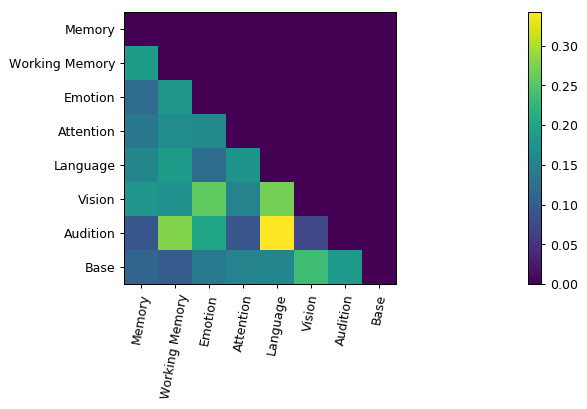

In [30]:
fig=plt.figure(dpi=90); ax=fig.add_subplot(111)
np.fill_diagonal(lmutual_matrix_lou,0)
fig.subplots_adjust(right=5)
plt.imshow(np.tril(lmutual_matrix_lou), interpolation='nearest')
plt.xticks(range(len(domains)))
plt.yticks(range(len(domains)))
plt.colorbar()
ax.set_xticklabels(domains, rotation='80')
ax.set_yticklabels(domains)
plt.figure()

In [29]:
lmodular_freq=np.zeros([107,107])
for x in domains:
        for h,n in enumerate(left_region_labels):
            if n in lG_part[x].keys():
                for f,m in enumerate(left_region_labels):
                    if m in lG_part[x].keys():
                        if n != m:
                            if lG_part[x][n]==lG_part[x][m]:
                                lmodular_freq[h][f]=lmodular_freq[h][f]+1
                            #if lmodular_freq[h][f]==7:
                                #print n, m, lmodular_freq[h][f]

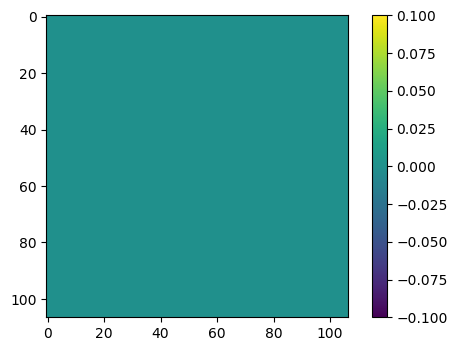

In [32]:
figu=plt.figure(dpi=100)
plt.imshow(lmodular_freq, interpolation='nearest')
plt.colorbar()

Newman

In [30]:
lNw_mod={}
lMod={}
for x in domains:
    lMod[x]=mod.newman_partition(G_lnoweight[x])
    lNw_mod[x]=lMod[x].modularity_newman()

In [31]:
lsample_parts=[]
for x, y in enumerate (domains):
    for a,b in enumerate (domains):
        lsample_parts.append(mutual_info(lMod[y],lMod[b]))

In [32]:
lG_new={}
for domain in domains:
    lG_new[domain]=lMod[domain].index_as_node_names()
    lnew_number=len (lG_new[domain])
    print domain, lnew_number

Memory 4
Working Memory 4
Emotion 7
Attention 4
Language 5
Vision 3
Audition 2
Base 3


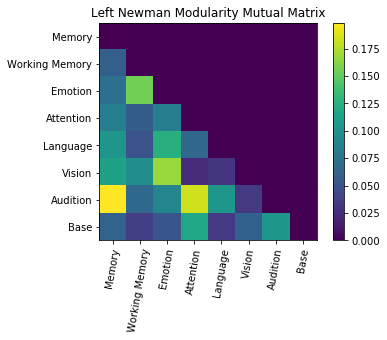

In [36]:
lmutual_matrix_new=np.zeros([len(domains),len(domains)])
for x,y in enumerate(domains):
    for a,b in enumerate(domains):
        lmutual_matrix_new[x][a]=mod.mutual_information(lMod[y].index,lMod[b].index)
fig=plt.figure(); ax=fig.add_subplot(111)
np.fill_diagonal(lmutual_matrix_new,0)
plt.imshow(np.tril(lmutual_matrix_new), interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,7,])
plt.yticks([0,1,2,3,4,5,6,7,])
plt.colorbar()
ax.set_xticklabels(domains, rotation='80')
ax.set_yticklabels(domains)
plt.title('Left Newman Modularity Mutual Matrix')
plt.figure()

Simulated Annealing

In [221]:
lSim_part={}
for x in domains:
    lSim_part[x]=mod.simulated_annealing(G_lnoweight[x])

T: 5.00e+01 energy: 2.53e-02 best: 0.00e+00
T: 4.98e+01 energy: 1.08e-02 best: 0.00e+00
T: 4.95e+01 energy: 1.15e-02 best: 0.00e+00
T: 4.93e+01 energy: 3.41e-03 best: 0.00e+00
T: 4.90e+01 energy: 3.73e-02 best: 0.00e+00
T: 4.88e+01 energy: 2.50e-02 best: 0.00e+00
T: 4.85e+01 energy: 6.41e-03 best: -1.16e-02
T: 4.83e+01 energy: 1.56e-02 best: -1.16e-02
T: 4.80e+01 energy: 2.76e-02 best: -1.16e-02
T: 4.78e+01 energy: 1.96e-02 best: -1.16e-02
T: 4.76e+01 energy: 2.20e-02 best: -1.16e-02
T: 4.73e+01 energy: 2.00e-02 best: -1.16e-02
T: 4.71e+01 energy: 1.89e-02 best: -1.16e-02
T: 4.68e+01 energy: 1.68e-02 best: -1.16e-02
T: 4.66e+01 energy: 1.79e-02 best: -1.16e-02
T: 4.64e+01 energy: 6.91e-03 best: -1.16e-02
T: 4.61e+01 energy: 1.24e-02 best: -1.16e-02
T: 4.59e+01 energy: 2.01e-02 best: -1.16e-02
T: 4.57e+01 energy: 1.55e-02 best: -1.16e-02
T: 4.55e+01 energy: 2.34e-02 best: -1.16e-02
T: 4.52e+01 energy: 2.00e-02 best: -1.16e-02
T: 4.50e+01 energy: 2.27e-02 best: -1.16e-02
T: 4.48e+01 ener

In [223]:
for x in domains:
    output='Left_Sim_'+x+'_.pck'
    pickle.dump(lSim_part[x], open (output,'wb'))

In [230]:
for x in domains:
    print x, ':', lSim_part[x][1], '--', len(lSim_part[x][0].index)

Memory : 0.326147658719 -- 3
Working Memory : 0.317321428571 -- 3
Emotion : 0.299334347242 -- 3
Attention : 0.383953168044 -- 3
Language : 0.285190249703 -- 3
Vision : 0.359254116247 -- 4
Audition : 0.374131944444 -- 2
Base : 0.168875181103 -- 2


# Right Modularity

In [231]:
G_rnoweight={x: brainmap.remove_weight_edge_attribute(G_domain_right[x]) for x in domains }

In [34]:
n_it=1000
doms_r={}
for x in domains:
    doms_r[x]=[random_g_mod(G_rnoweight[x]) for m in range(n_it)]

In [35]:
rrand_parts=[]
for k in domains:
    for c in domains:
        rrand_parts.append([mutual_info(doms_r[k][m],doms_r[c][m]) for m in range (n_it)])

/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/brainx/modularity.py:1007: RuntimeWarning: invalid value encountered in double_scalars
  return -2*num/den


In [40]:
rdistrib=np.asanyarray(rrand_parts)
z,pval=scipy.stats.normaltest(rdistrib)
np.all(pval < 0.05)

/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/scipy/stats/stats.py:1347: RuntimeWarning: invalid value encountered in less
  denom = np.where(denom < 0, 99, denom)
/Users/owner/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/scipy/stats/stats.py:1348: RuntimeWarning: invalid value encountered in less
  term2 = np.where(denom < 0

False

Louvain

In [161]:
rLouvain_part={}
rDendogram={}
rG_part={}
Q_right={}
for x in domains:
    rG_part[x]=(community.best_partition(G_domain_right[x]))
    rDendogram[x]=community.generate_dendrogram(G_domain_right[x])
    Q_right[x]=community.modularity(rG_part[x], G_domain_right[x])
    #filename='bestpart_'+x+'_rcost.pck'
    #pickle.dump (G_part[x], open(filename, 'wb'))
    rLouvain_part[x]=brainmap.make_brainx_style_partition(rG_part[x])
    print "Right Louvain Modularity: ", x, '|',community.modularity(rG_part[x], G_domain_right[x]),':',len(rLouvain_part[x])

Right Louvain Modularity:  Memory | 0.316605264323 : 6
Right Louvain Modularity:  Working Memory | 0.330585193727 : 5
Right Louvain Modularity:  Emotion | 0.251280274091 : 5
Right Louvain Modularity:  Attention | 0.321197695762 : 6
Right Louvain Modularity:  Language | 0.316632617765 : 5
Right Louvain Modularity:  Vision | 0.320977244985 : 6
Right Louvain Modularity:  Audition | 0.36727705113 : 2
Right Louvain Modularity:  Base | 0.184665309071 : 7


In [37]:
rmutual_matrix_lou=np.zeros([len(domains),len(domains)])
for x,y in enumerate(domains):
    for a,b in enumerate(domains):
        rmutual_matrix_lou[x][a]=mod.mutual_information(rLouvain_part[y],rLouvain_part[b])

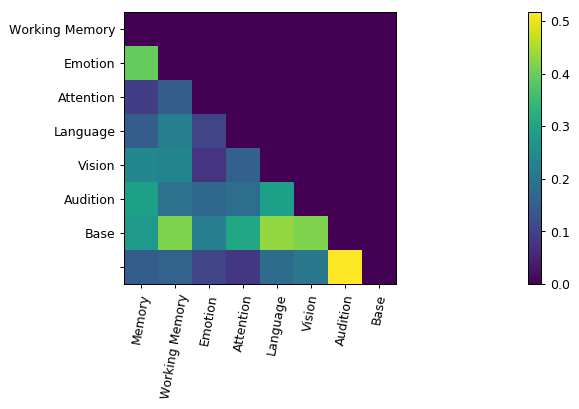

In [43]:
fig=plt.figure(dpi=90); ax=fig.add_subplot(111)
np.fill_diagonal(rmutual_matrix_lou,0)
fig.subplots_adjust(right=5)
plt.imshow(np.tril(rmutual_matrix_lou), interpolation='nearest')
plt.xticks([0,1,2,3,4,5,6,7])
plt.colorbar()
ax.set_xticklabels(domains, rotation='80')
ax.set_yticklabels(domains)
plt.figure()

In [38]:
rmodular_freq=np.zeros([108,108])
for x in domains:
        for h,n in enumerate(left_region_labels):
            if n in rG_part[x].keys():
                for f,m in enumerate(right_region_labels):
                    if m in rG_part[x].keys():
                        if n != m:
                            if rG_part[x][n]==rG_part[x][m]:
                                rmodular_freq[h][f]=rmodular_freq[h][f]+1

Newman

In [39]:
rNw_mod={}
rMod={}
for x in domains:
    rMod[x]=mod.newman_partition(G_rnoweight[x])
    rNw_mod[x]=rMod[x].modularity_newman()

In [40]:
rsample_parts=[]
for x, y in enumerate (domains):
    for a,b in enumerate (domains):
        rsample_parts.append(mutual_info(rMod[y],rMod[b]))

In [41]:
rG_new={}
for domain in domains:
    rG_new[domain]=rMod[domain].index_as_node_names()
    rnew_number=len (rG_new[domain])
    print domain, rnew_number

Memory 4
Working Memory 5
Emotion 3
Attention 4
Language 4
Vision 4
Audition 2
Base 5


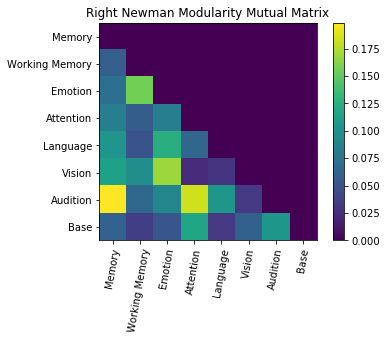

In [48]:
rmutual_matrix_new=np.zeros([len(domains),len(domains)])
for x,y in enumerate(domains):
    for a,b in enumerate(domains):
        rmutual_matrix_new[x][a]=mod.mutual_information(lMod[y].index,lMod[b].index)
fig=plt.figure(); ax=fig.add_subplot(111)
np.fill_diagonal(lmutual_matrix_new,0)
plt.imshow(np.tril(lmutual_matrix_new), interpolation='nearest')
plt.xticks(range(len(domains)))
plt.yticks(range(len(domains)))
plt.colorbar()
ax.set_xticklabels(domains, rotation='80')
ax.set_yticklabels(domains)
plt.title('Right Newman Modularity Mutual Matrix')
plt.figure()

Simulated Annealing

In [236]:
rSim_part={x: mod.simulated_annealing(G_rnoweight[x]) for x in domains}

T: 5.00e+01 energy: 2.83e-02 best: 0.00e+00
T: 4.98e+01 energy: 3.39e-02 best: 0.00e+00
T: 4.95e+01 energy: -2.03e-02 best: -2.25e-02
T: 4.93e+01 energy: 1.69e-02 best: -3.29e-02
T: 4.90e+01 energy: 9.15e-03 best: -3.29e-02
T: 4.88e+01 energy: -8.74e-03 best: -3.29e-02
T: 4.85e+01 energy: 2.29e-02 best: -3.29e-02
T: 4.83e+01 energy: 2.10e-02 best: -3.29e-02
T: 4.80e+01 energy: -1.79e-03 best: -3.29e-02
T: 4.78e+01 energy: 4.02e-02 best: -3.29e-02
T: 4.76e+01 energy: -2.49e-03 best: -3.29e-02
T: 4.73e+01 energy: 1.72e-02 best: -3.29e-02
T: 4.71e+01 energy: 1.82e-02 best: -3.29e-02
T: 4.68e+01 energy: 4.73e-03 best: -3.29e-02
T: 4.66e+01 energy: 2.68e-02 best: -3.29e-02
T: 4.64e+01 energy: 2.77e-02 best: -3.29e-02
T: 4.61e+01 energy: 4.00e-02 best: -3.29e-02
T: 4.59e+01 energy: -2.29e-04 best: -3.29e-02
T: 4.57e+01 energy: 2.14e-02 best: -3.29e-02
T: 4.55e+01 energy: 8.59e-03 best: -3.29e-02
T: 4.52e+01 energy: 1.83e-02 best: -3.29e-02
T: 4.50e+01 energy: 5.98e-03 best: -3.29e-02
T: 4.48

In [237]:
for x in domains:
    output='Right_Sim_'+x+'_.pck'
    pickle.dump(rSim_part[x], open(output,'wb'))

In [238]:
for x in domains:
    print x, ':', rSim_part[x][1], '--', len(rSim_part[x][0].index)

Memory : 0.331779576196 -- 3
Working Memory : 0.351647791042 -- 4
Emotion : 0.249375714719 -- 3
Attention : 0.321739292088 -- 3
Language : 0.31965 -- 3
Vision : 0.332091907587 -- 3
Audition : 0.357142857143 -- 2
Base : 0.155979038448 -- 2


# Figures

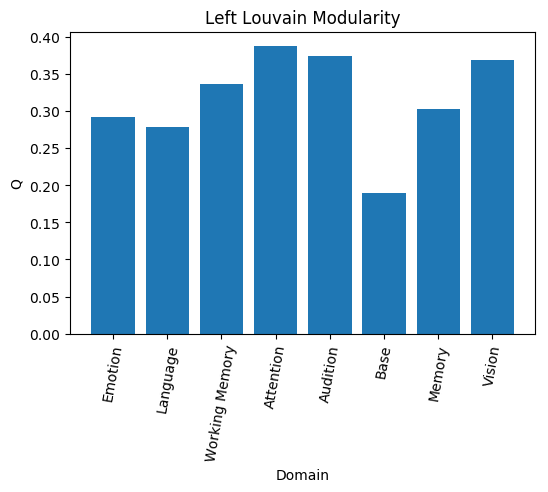

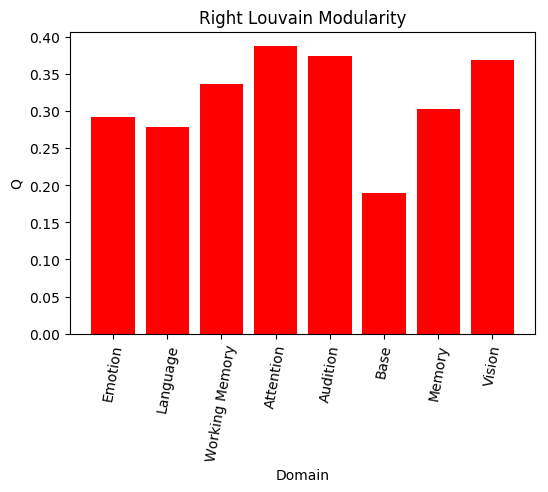

In [49]:
#Louvain Modularity Q Figures

fig1=plt.figure(dpi=100)

ax1=plt.subplot(111)
ax1.bar(range(len(Q_left.values())),Q_left.values(),)
ax1.set_xticks(range(8))
ax1.set_xticklabels(Q_left.keys(), rotation='80')
plt.title('Left Louvain Modularity')
plt.ylabel('Q')
plt.xlabel('Domain')
plt.show()

fig2=plt.figure(dpi=100)
ax2=plt.subplot(111)
ax2.bar(range(len(Q_right.values())),Q_right.values(), color='r')
ax2.set_xticks(range(8))
ax2.set_xticklabels(Q_left.keys(), rotation='80')
plt.title('Right Louvain Modularity')
plt.ylabel('Q')
plt.xlabel('Domain')
plt.show()


# Creating Node Image Files

In [448]:
def node_file(partition, y, filename):
    
    df=pd.read_csv('/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Label_coordinates.csv', header=None, names=['x','y','z','regions'])
    df.insert(4,'module',1,True)
    df.insert(5,'size',1,True)
    df.insert(6,'nodes',0,True)
    df=df[['x','y','z','module','size','regions','nodes']]
    
    for region in partition.keys():
        for n in range(len(df)):
            if region == df.loc[n,'regions']:
                df.loc[n,'nodes']=region
                df.loc[n,'module']=partition[region]
                df.loc[n, 'size']=y[region]
    df=df[['x','y','z','module','size','nodes']]
    df=df[df.nodes != 0]
    df.index=range(len(df))
    outdir='/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/'
    df.to_csv(outdir+filename, header=False, index=False, index_label=False)
    
    return df

def sim_node_file(sim_partition, y, filename):
    
    fd=pd.read_csv('/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Label_coordinates.csv', header=None, names=['x','y','z','regions'])
    fd.insert(4,'module',1,True)
    fd.insert(5,'size',1,True)
    fd.insert(6,'nodes',0,True)
    fd=fd[['x','y','z','module','size','regions','nodes']]
    
    for mods in range(len(sim_partition)):
        for region in range(len(sim_partition[mods])):
            for n in range(len(fd)):
                if sim_partition[mods][region] == fd.loc[n, 'regions']:
                    fd.loc[n, 'nodes']=sim_partition[mods][region]
                    fd.loc[n, 'module']=mods
                    fd.loc[n, 'size']=y[(sim_partition[mods][region])]
    fd=fd[['x','y','z','module','size','nodes']]
    fd=fd[fd.nodes != 0]
    fd.index=range(len(fd))
    outdir='/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/'
    fd.to_csv(outdir+filename, header=False, index=False, index_label=False)
    
    return fd

In [425]:
for x in domains:
    node_file(rG_part[x],y=rbasic_metrics[x]['eigenvector_cent'], filename='Right_Lou_'+x+'_node.csv' )
    node_file(lG_part[x],y=lbasic_metrics[x]['eigenvector_cent'], filename='Left_Lou_'+x+'_node.csv' )

In [427]:
for x in domains:
    lcsv_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Lateralized/Left_Lou_'+x+'_node.csv'
    ltxt_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/Left/Left_Lou_'+x+'.node'
    with open(ltxt_file, "w") as lmy_output_file:
        with open(lcsv_file, "r") as lmy_input_file:
            [ lmy_output_file.write(" ".join(row)+'\n') for row in csv.reader(lmy_input_file)]
        lmy_output_file.close()

In [428]:
for x in domains:
    rcsv_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Lateralized/Right_Lou_'+x+'_node.csv'
    rtxt_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/Right/Right_Lou_'+x+'.node'
    with open(rtxt_file, "w") as rmy_output_file:
        with open(rcsv_file, "r") as rmy_input_file:
            [ rmy_output_file.write(" ".join(row)+'\n') for row in csv.reader(rmy_input_file)]
        rmy_output_file.close()

In [149]:
left_domain_thresh_jaccard['Base']=left_thresh_jaccard
right_domain_thresh_jaccard['Base']=right_thresh_jaccard

In [180]:
ldf={}
rdf={}
for x in domains:
    ldf[x]=pd.DataFrame(nx.to_numpy_matrix(G_domain_left[x]))
    rdf[x]=pd.DataFrame(nx.to_numpy_matrix(G_domain_right[x]))
    ldf[x].to_csv('/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Left_'+x+'_edge.csv', header=False, index=False, index_label=False)
    rdf[x].to_csv('/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Right_'+x+'_edge.csv', header=False, index=False, index_label=False)

In [181]:
for x in domains:
    lcsv_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Left_'+x+'_edge.csv'
    ltxt_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/EdgeFiles/Left_'+x+'.edge'
    with open(ltxt_file, "w") as lmy_output_file:
        with open(lcsv_file, "r") as lmy_input_file:
            [ lmy_output_file.write(" ".join(row)+'\n') for row in csv.reader(lmy_input_file)]
        lmy_output_file.close()

In [182]:
for x in domains:
    rcsv_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Right_'+x+'_edge.csv'
    rtxt_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/EdgeFiles/Right_'+x+'.edge'
    with open(rtxt_file, "w") as rmy_output_file:
        with open(rcsv_file, "r") as rmy_input_file:
            [ rmy_output_file.write(" ".join(row)+'\n') for row in csv.reader(rmy_input_file)]
        rmy_output_file.close()

In [403]:
df=pd.read_csv('/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Label_coordinates.csv', header=None, names=['x','y','z','regions'])
df.insert(4,'module',1,True)
df.insert(5,'size',1,True)
df.insert(6,'nodes',0,True)
df=df[['x','y','z','module','size','regions','nodes']]

In [409]:
for mods in range(len(x)):
    for region in range(len(x[mods])):
        for n in range(len(df)):
            if x[mods][region] == df.loc[n, 'regions']:
                df.loc[n, 'nodes']=x[mods][region]
                df.loc[n, 'module']=mods

In [418]:
sim_node_file(x, y=rbasic_metrics['Base']['degree_cent'], filename= 'Right_Base_node.csv')

,x,y,z,module,size,nodes
0,7.243636,37.010909,9.425455,0,0.177570,Cingulum_Ant_R_1
1,7.986532,46.222222,15.609428,1,0.102804,Cingulum_Ant_R_2
2,7.557252,33.832061,23.511450,1,0.186916,Cingulum_Ant_R_3
3,9.115880,22.454936,24.206009,0,0.186916,Cingulum_Ant_R_4
4,8.902439,36.186992,-0.317073,0,0.112150,Cingulum_Ant_R_5
5,51.437262,14.646388,4.365019,1,0.233645,Frontal_Inf_Oper_R_1
6,45.068376,11.418803,32.504273,1,0.205607,Frontal_Inf_Oper_R_2
7,52.421488,13.487603,17.305785,1,0.214953,Frontal_Inf_Oper_R_3
8,51.693023,11.283721,25.200000,1,0.186916,Frontal_Inf_Oper_R_4
9,44.184100,16.878661,31.430962,1,0.224299,Frontal_Inf_Oper_R_5


In [449]:
rpart={}
lpart={}
for p in domains:
    rpart[p]=rSim_part[p][0].index_as_node_names()
    lpart[p]=lSim_part[p][0].index_as_node_names()
    lefts=sim_node_file(rpart[p], y=rbasic_metrics[p]['degree_cent'], filename='Right_Sim_'+p+'_node.csv')
    rights=sim_node_file(lpart[p], y=lbasic_metrics[p]['degree_cent'], filename='Left_Sim_'+p+'_node.csv')

In [450]:
for x in domains:
    lcsv_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Left_Sim_'+x+'_node.csv'
    ltxt_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/Left_Sim_'+x+'.node'
    with open(ltxt_file, "w") as lmy_output_file:
        with open(lcsv_file, "r") as lmy_input_file:
            [ lmy_output_file.write(" ".join(row)+'\n') for row in csv.reader(lmy_input_file)]
        lmy_output_file.close()

In [ ]:
for x in domains:
    rcsv_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/CSV/Right_Sim_'+x+'_node.csv'
    rtxt_file = '/Users/owner/Desktop/BrainImagingViewer/BrainNetViewer_20150807/Data/NodeFiles/Right_Sim_'+x+'.node'
    with open(rtxt_file, "w") as rmy_output_file:
        with open(rcsv_file, "r") as rmy_input_file:
            [ rmy_output_file.write(" ".join(row)+'\n') for row in csv.reader(rmy_input_file)]
        rmy_output_file.close()

In [452]:
lbasic_metrics['Base']['topdegree_cent']

['Frontal_Mid_Orbb_L_3',
 'Frontal_Mid_L_6',
 'Precentral_L_8',
 'Frontal_Mid_L_16',
 'Precentral_L_2']